In [1]:
import numpy as np 
from pathlib import Path
from src import db, fig2, utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 12
fs_title = 14
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI
areas = ["V1", "medial", "lateral", "anterior"]
ctypes = ["exc", "inh"]
corridor_length = 400
from IPython.display import clear_output

In [2]:
zscored = True
if zscored == True:
    main_dir = Path("../data/overall")
else:
    main_dir = Path("../data/notz/overall")
print(f"Using data from {main_dir}")
correct_incorrect = np.load(main_dir/"last_training"/"correct_incorrect_cds.npy")
all_first = np.load(main_dir/"all_first"/"cod_dirs_0_100.npy")
first_training = np.load(main_dir/"first_training"/"cod_dirs_0_100.npy")
last_training = np.load(main_dir/"last_training"/"cod_dirs_0_100.npy")
all_last = np.load(main_dir/"all_last"/"cod_dirs_0_100.npy")
gis_all_first,_,_ = fig2.compute_gi(all_first, 100)
gis_all_last,_,_ = fig2.compute_gi(all_last, 100)
first_training_gi, _, _ = fig2.compute_gi(first_training, 100)
last_training_gi, _, _ = fig2.compute_gi(last_training, 100)
all_rew = gis_all_first.mean(0)[:,0]
first_training_inv = first_training_gi.mean(0)[:,0]
last_training_inv = last_training_gi.mean(0)[:,0]
all_rew_last = gis_all_last.mean(0)[:,0]
correct = correct_incorrect[:, :, :, :, 0, :]
incorrect = correct_incorrect[:, :, :, :, 1, :]
grouped = pd.read_csv(r"C:\Users\labadmin\Documents\oneshot-neural\results\invariancebygroup_arealayer.csv", index_col=0)
normal = grouped.query("Rearing == 'Normal' & layer == 2").reset_index(drop=True)
dark = grouped.query("Rearing == 'Dark reared' & layer == 2").reset_index(drop=True)
passive = normal.groupby("area").mean(numeric_only=True).reindex(["V1", "medial", "lateral","anterior"])["pair_invariance"].values
dark_inv = dark.groupby("area").mean(numeric_only=True).reindex(["V1", "medial", "lateral","anterior"])["pair_invariance"].values

Using data from ..\data\overall


(0.0, 1.0)

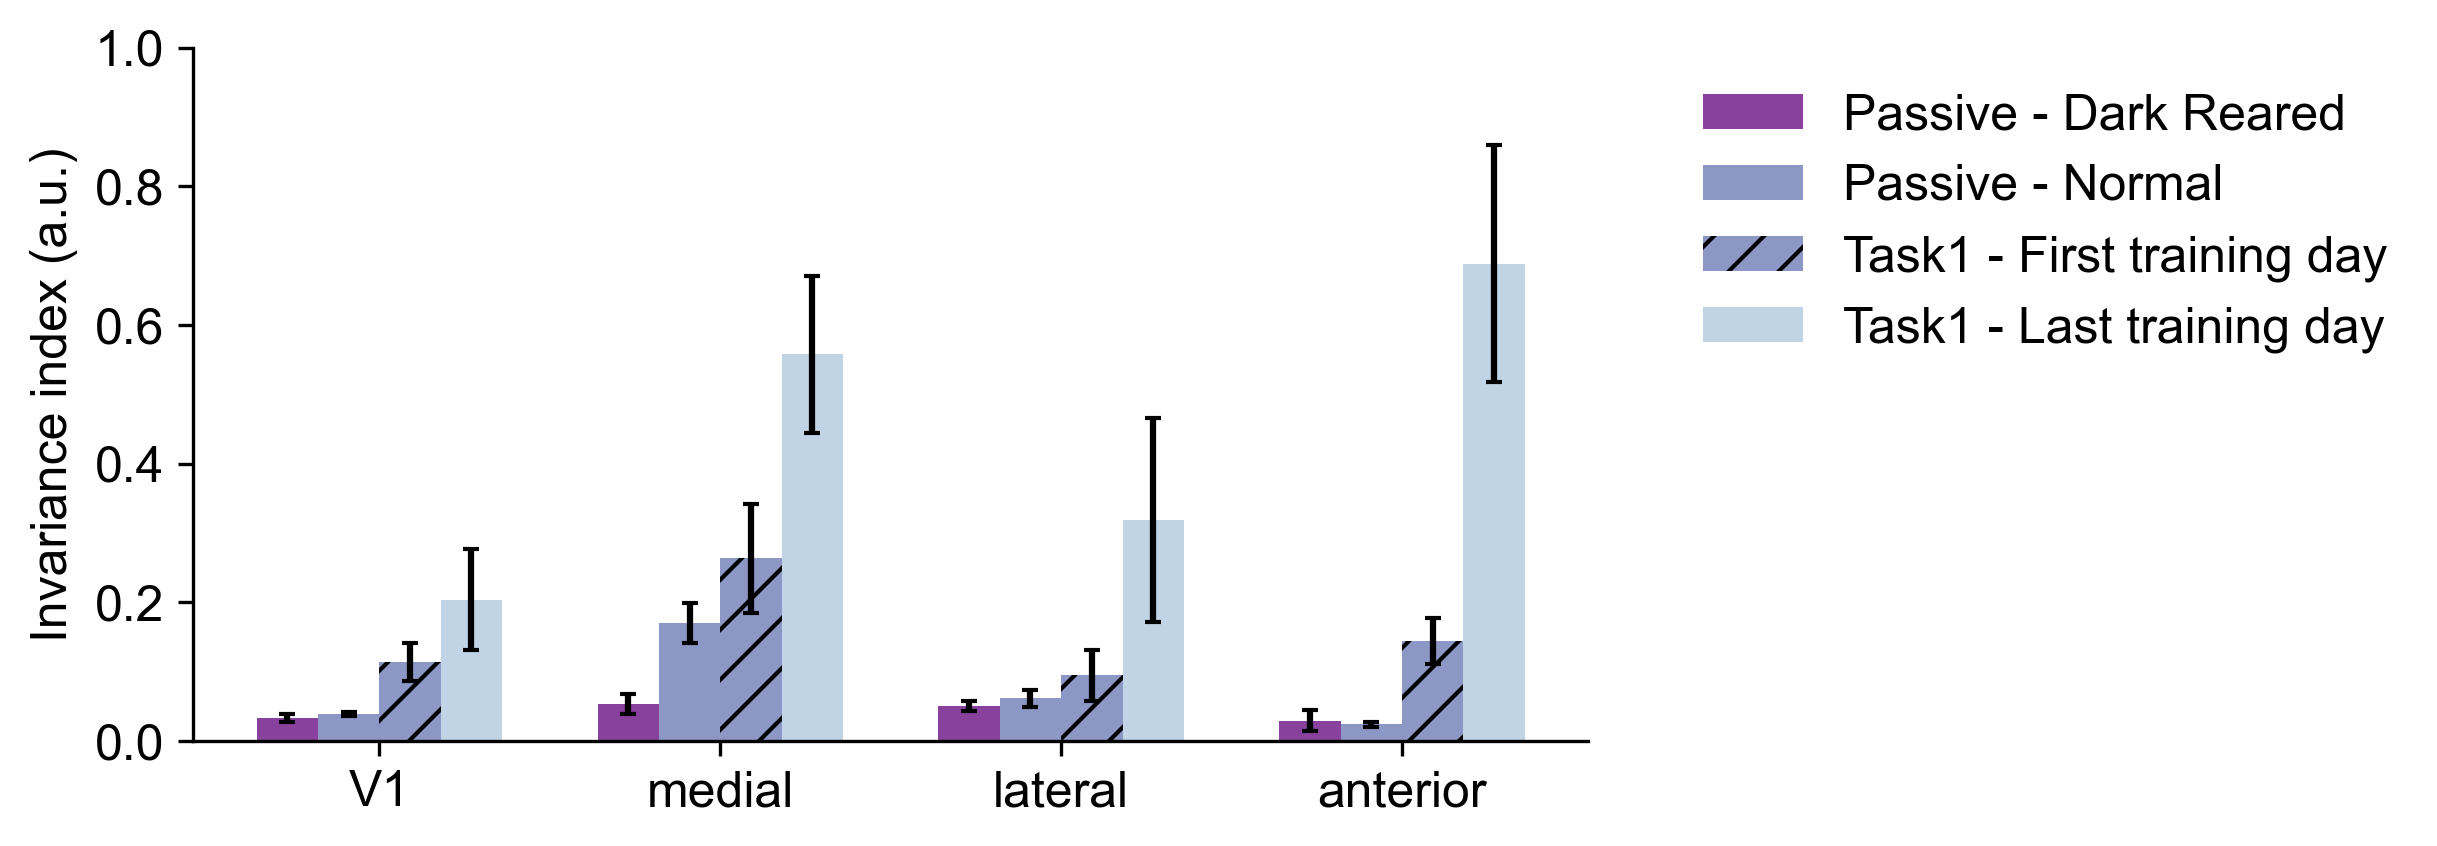

In [6]:
from scipy.stats import sem
colors = sns.color_palette(palette='BuPu_r', n_colors=3)
# Compute SEM for each quantity per area
areas_order = ["V1", "medial", "lateral", "anterior"]

# Passive and dark_inv SEMs (groupby mouse, per area)
passive_sem = normal.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
passive_err = normal.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

dark_df = grouped.query("Rearing == 'Dark reared' & layer == 2")
dark_inv = dark_df.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
dark_err = dark_df.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

# last_training_inv and all_rew_last SEMs (from arrays)
last_training_err = sem(last_training_gi[:, :, 0], axis=0)
first_training_err = sem(first_training_gi[:, :, 0], axis=0)

x = np.arange(len(areas_order))
width = 0.18

plt.figure(figsize=(6, 3), dpi=300)
plt.bar(x - 1.5*width, dark_inv, width, yerr=dark_err, label='Passive - Dark Reared', color=colors[0], capsize=2)
plt.bar(x - 0.5*width, passive, width, yerr=passive_err, label='Passive - Normal', color=colors[1], capsize=2)
plt.bar(x + 0.5*width, first_training_inv, width, yerr=first_training_err, label='Task1 - First training day', color=colors[1], capsize=2, hatch='//')
plt.bar(x + 1.5*width, last_training_inv, width, yerr=last_training_err, label='Task1 - Last training day', color=colors[2], capsize=2)

plt.xticks(x, areas_order)
plt.ylabel('Invariance index (a.u.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=default_font, frameon=False)
plt.ylim(0,1)

In [50]:
first_training_inv_medial = first_training_gi[:,1,0]
last_training_inv_medial = last_training_gi[:,1,0]
first_training_inv_anterior = first_training_gi[:,3,0]
last_training_inv_anterior = last_training_gi[:,3,0]
all_rew_last_medial = gis_all_last[:,1,0]
correct = correct_incorrect[:, :, :, :, 0, :]
incorrect = correct_incorrect[:, :, :, :, 1, :] # mice, ttype, areas, cell types, correct/incorrect, positions
gis_correct, _,_ = fig2.compute_gi(correct, 100)
gis_incorrect, _,_= fig2.compute_gi(incorrect, 100)
correct_gi_medial = gis_correct[:,1,0]
incorrect_gi_medial = gis_incorrect[:,1,0]

Text(1.7, 0.7, '')

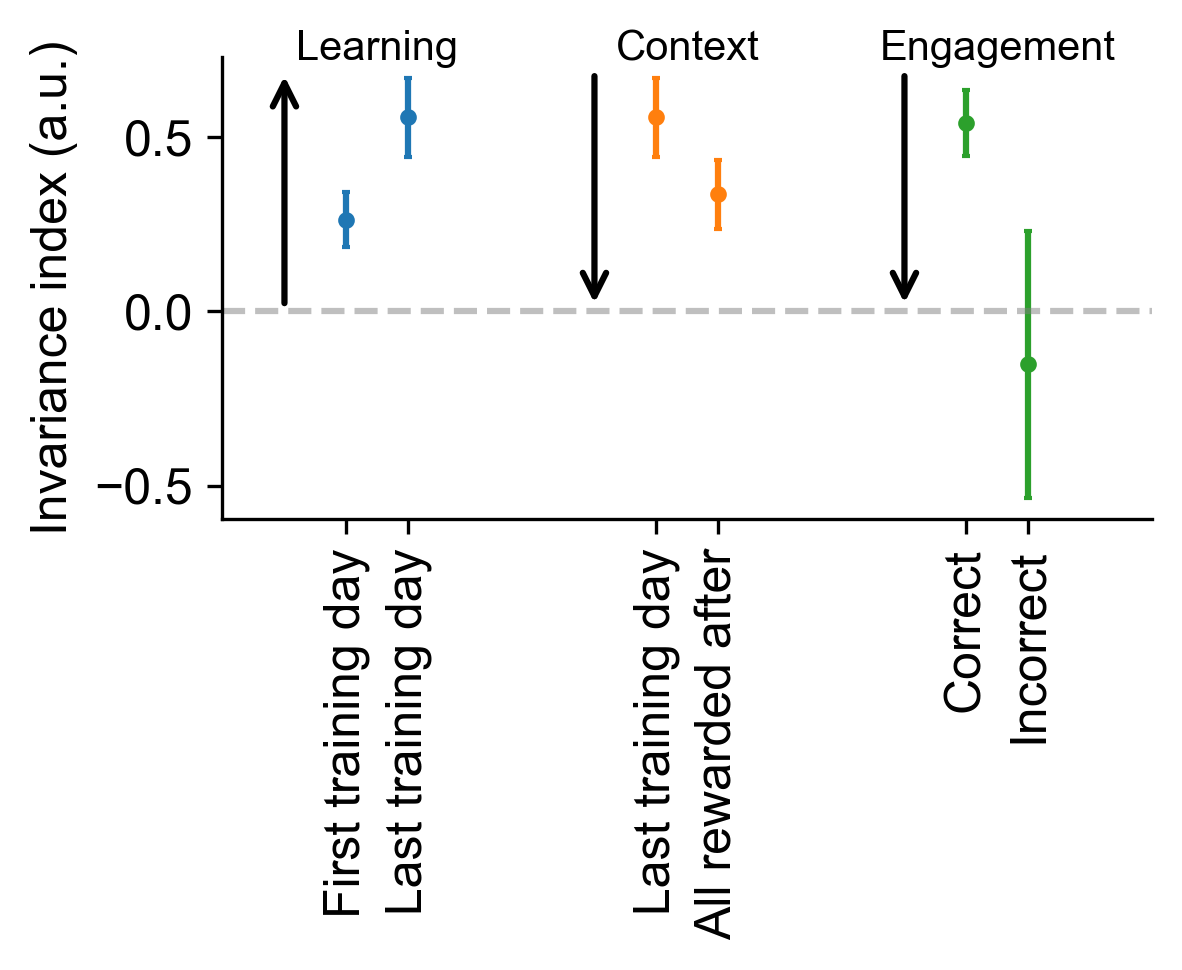

In [24]:
from scipy.stats import sem

# Prepare data for plotting

comparisons = [
    ("First vs Last Training", first_training_inv_medial, last_training_inv_medial),
    ("Last Training vs All Rew Last", last_training_inv_medial, all_rew_last_medial),
    ("Correct vs Incorrect", correct_gi_medial, incorrect_gi_medial)
]

means = []
sems = []
labels = []

for label, arr1, arr2 in comparisons:
    means.append([arr1.mean(), arr2.mean()])
    sems.append([sem(arr1), sem(arr2)])
    labels.append(label)

means = np.array(means)
sems = np.array(sems)

plt.figure(figsize=(4, 2), dpi=300)
for i, label in enumerate(labels):
    plt.errorbar([i-0.1, i+0.1], means[i], yerr=sems[i], fmt='o', capsize=1, label=label, markersize=3)

plt.xticks([-.1,.1, .9, 1.1, 1.9, 2.1], ["First training day", "Last training day", "Last training day", "All rewarded after", "Correct", "Incorrect"], rotation=90)
plt.ylabel('Invariance index (a.u.)')
#plt.legend(frameon=False)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# add text on top of each comparison 
plt.text(0,.7, "Learning", fontsize=10, ha='center', va='bottom')
plt.text(1,.7, "Context", fontsize=10, ha='center', va='bottom')
plt.text(2,.7, "Engagement", fontsize=10, ha='center', va='bottom')
plt.xlim(-0.5, 2.5)
plt.annotate('', xy=(-0.3, 0.7), xytext=(-0.3,0), fontsize=fs_title, fontweight='bold', ha='center', va='center', arrowprops=dict(arrowstyle='->', lw=1.5))
plt.annotate('', xy=(.7, 0), xytext=(.7,0.7), fontsize=fs_title, fontweight='bold', ha='center', va='center', arrowprops=dict(arrowstyle='->', lw=1.5))
plt.annotate('', xy=(1.7, 0), xytext=(1.7,0.7), fontsize=fs_title, fontweight='bold', ha='center', va='center', arrowprops=dict(arrowstyle='->', lw=1.5))
#place an arrow


In [8]:
def regplot(DI_metrics, DI_metrics_behav, metric, area, layer, xlabel, title, ax, refline=True, norm=False, sig_coor=(.6,.4), ylabel=None):
    from scipy import stats
    def significance(pval):
        if  pval >= .05:
            sig = ''
        elif (pval < .05) and (pval >= .01):
            sig = '*'
        elif (pval < .01) and (pval >= .001):
            sig = '**'
        elif (pval < .001) and (pval >= .0001):
            sig = '***'
        else:
            sig = '****'
        return sig

    query = f"layer == {layer} & area == '{area}'"
    if (norm == True) & (metric=='GI'):
        brain_pair_inv = DI_metrics.query(query)[f"{metric}_norm_brain"].values
        behav_inv =  DI_metrics_behav[f"{metric}_norm_behav"].values
    else:
        brain_pair_inv = DI_metrics.query(query)[f"{metric}_brain"].values
        behav_inv =  DI_metrics_behav[f"{metric}_behav"].values
    brain_pair_inv = brain_pair_inv[~np.isnan(behav_inv)]
    behav_inv = behav_inv[~np.isnan(behav_inv)]
    corr, pval = stats.pearsonr(brain_pair_inv, behav_inv)
    print(np.round(corr,2), np.round(pval,5))
    sig = significance(pval)
    if pval > .05:
        if layer == 1:
            sns.regplot(x=behav_inv, y=brain_pair_inv, ci=95, color=".3", line_kws=dict(color="r"), scatter_kws=dict(alpha=0.8, color = '#989898'), fit_reg=False, ax=ax)
        else:
            sns.regplot(x=behav_inv, y=brain_pair_inv, ci=95, color=".3", line_kws=dict(color="r"), scatter_kws=dict(alpha=0.8, color = '#020508'), fit_reg=False, ax=ax)
    else:
        if layer == 1:
            sns.regplot(x=behav_inv, y=brain_pair_inv, ci=95, color=".3", line_kws=dict(color="r"), scatter_kws=dict(alpha=0.8, color = '#989898'), fit_reg=True, ax=ax)
        else:
            sns.regplot(x=behav_inv, y=brain_pair_inv, ci=95, color=".3", line_kws=dict(color="r"), scatter_kws=dict(alpha=0.8, color = '#020508'), fit_reg=True, ax=ax)
    #if sig != '':
    ax.text(sig_coor[0],sig_coor[1],f"R={corr:.2f}{sig}", color='r')
    #else:
    #    ax.text(sig_coor[0],sig_coor[1],f"", color='r')
    #if metric == "DI":
        #ax.set_xticks([.4,1], [".4","1"])
        #ax.set_yticks([.4,1], [".4","1"])
        #ax.set_xlim(.35,1.2)
        #ax.set_ylim(.25,1.5)
    #else:
    #    ax.set_xlim(-.2,1.2)
    #    ax.set_ylim(-.2,1.2)
    #    ax.set_xticks([0,.5, 1], ["0",".5", "1"])
    #    ax.set_yticks([0,.5, 1], ["0",".5", "1"])
    if layer == 1:
        ltext = "100$\mu m$"
    else:
        ltext = "250$\mu m$"
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel("")
    if xlabel:
        ax.set_xlabel(f"behavioral DI")
    else:
        ax.set_xlabel("")
        #ax.set_xticklabels([])
    if title:
        if layer ==1:
            ax.set_title(f"{ltext}", loc='center', color='#989898')
        else:
            ax.set_title(f"{ltext}", loc='center', color='#020508')
    else:
        ax.set_title("")
    if refline:
        ax.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=1, alpha=.5)

def get_DI_GI_df(avg_mice_rep_mtx):
    Gcamp6_df_pair_DI = pd.DataFrame()
    areas = ['V1', 'medial', 'lateral', 'anterior']
    layers = [1,2]
    cat = ['Leaves', 'Circles', 'Dryland', 'Rocks', 'Tiles', 'Squares', 'Rleaves', 'Paved'] 
    for i_a, area in enumerate(areas):
        for layer in layers:
            df = pd.DataFrame()
            matrix = avg_mice_rep_mtx[i_a, layer-1, :, :] # gets the representational sim matrix for the area and layer
            behav_m = reduce_to_behav(matrix) # reduces the representational sim matrix to the behavioral instances
            only_train = behav_m[::2,::2] # gets the training instances
            a, b = np.triu_indices(8,1) # gets the upper triangle indices
            positive_cat = []
            negative_cat = []
            di_index = []
            for i in zip(a,b): #loops over all the posible pairs
                positive_cat.append(cat[i[0]])
                negative_cat.append(cat[i[1]])
                a_ab = only_train[i[0],i[0]] - only_train[i[0],i[1]] #x_11 - x_12
                b_ab = only_train[i[1],i[1]] - only_train[i[0],i[1]] #x_22 - x_12
                di_avg = np.mean([a_ab, b_ab]) # avg
                di_index.append(di_avg)
            df["positive_category"] = np.array(positive_cat)
            df["negative_category"] = np.array(negative_cat)
            df["DI_brain"] = np.array(di_index)
            df["area"] = area
            df["layer"] = layer
            Gcamp6_df_pair_DI = pd.concat([Gcamp6_df_pair_DI, df])
    Gcamp6_df_pair_DI.reset_index(inplace=True, drop=True)
    Gcamp6_df_pair_GI = pd.DataFrame()
    for i_a, area in enumerate(areas):
        for layer in layers:
            df = pd.DataFrame()
            matrix = avg_mice_rep_mtx[i_a, layer-1, :, :] # gets the representational sim matrix for the area and layer
            behav_m = reduce_to_behav(matrix) # reduces the representational sim matrix to the behavioral instances
            cross = behav_m[::2,1::2] # gets the crosstab
            a, b = np.triu_indices(8,1) # gets the upper triangle indices
            positive_cat = []
            negative_cat = []
            gi_index = []
            for i in zip(a,b): #loops over all the posible pairs
                positive_cat.append(cat[i[0]])
                negative_cat.append(cat[i[1]])
                ap_a = cross[i[0],i[0]] 
                ap_b = cross[i[1],i[0]] 
                bp_a = cross[i[0],i[1]]
                bp_b = cross[i[1],i[1]]
                gi = ((ap_a - ap_b) + (bp_b - bp_a))/2
                gi_index.append(gi)
            df["positive_category"] = np.array(positive_cat)
            df["negative_category"] = np.array(negative_cat)
            df["GI_brain"] = np.array(gi_index)
            df["area"] = area
            df["layer"] = layer
            Gcamp6_df_pair_GI = pd.concat([Gcamp6_df_pair_GI, df])
    Gcamp6_df_pair_GI.reset_index(inplace=True, drop=True)
    behav_new_metrics = pd.merge(Gcamp6_df_pair_DI, Gcamp6_df_pair_GI, on=['positive_category', 'negative_category', 'area', 'layer'])
    behav_new_metrics["category_pair"] = behav_new_metrics["positive_category"].str.lower() + "/" + behav_new_metrics["negative_category"].str.lower()
    return behav_new_metrics

def reduce_to_behav(ss_m, categories: int = 8, instances: int  = 4):
    """ 
    Reduces a representation matrix to ony textures used in the behavioral task

    Parameters
    ----------
    ss_m : array
        Representation matrix
    categories : int
        Number of categories
    instances : int
        Number of instances per category

    Returns
    -------
    behav_matrix : array
        Representation matrix for the textures used in the behavioral task
    """
    n_total = categories * instances
    cat_instance = np.arange(0,n_total,instances)
    behav_matrix = np.zeros((16,32))
    behav_instances = np.arange(0,16,2)
    for bhv, cat in zip(behav_instances, cat_instance):
        if cat == 12: # special case of rocks 
            behav_matrix[bhv,:] = ss_m[cat,:]
            behav_matrix[bhv+1,:] = ss_m[cat+2,:]
        else:
            behav_matrix[bhv,:] = ss_m[cat,:]
            behav_matrix[bhv+1,:] = ss_m[cat+1,:]
    cat_i = cat_instance + 1 
    col_cats = np.sort(np.concatenate((cat_instance, cat_i)))
    col_cats[np.where(col_cats == 13)] = 14
    behav_matrix = behav_matrix[:,col_cats]
    return behav_matrix

def get_DI_GI_behav(first100df):
    df_c = first100df.copy()
    df_c['positive_category'] = first100df['negative_category']
    df_c['negative_category'] = first100df['positive_category']
    crosstab = pd.concat([first100df, df_c])
    crosstab_GI = crosstab[['positive_category', 'negative_category', 'GI_behav']]
    crosstab_GI = pd.crosstab(crosstab_GI['positive_category'], crosstab_GI['negative_category'], values = crosstab_GI['GI_behav'], aggfunc='mean')
    index_order = ['Leaves', 'Circles', 'Dryland', 'Rocks', 'Tiles', 'Squares', 'Rleaves', 'Paved']
    crosstab_ordered_GI = crosstab_GI.reindex(index = index_order, columns=index_order)
    crosstab_DI = crosstab[['positive_category', 'negative_category', 'DI_behav']]
    crosstab_DI = pd.crosstab(crosstab_DI['positive_category'], crosstab_DI['negative_category'], values = crosstab_DI['DI_behav'], aggfunc='mean')
    index_order = ['Leaves', 'Circles', 'Dryland', 'Rocks', 'Tiles', 'Squares', 'Rleaves', 'Paved']
    crosstab_ordered_DI = crosstab_DI.reindex(index = index_order, columns=index_order)
    a,b = np.triu_indices(8, k=1)
    bhv_gi_num_ordered  = []
    bhv_di_ordered = []
    for i in zip(a,b):
        bhv_gi_num_ordered.append(crosstab_ordered_GI.iloc[i[0],i[1]])
        bhv_di_ordered.append(crosstab_ordered_DI.iloc[i[0],i[1]])
    bhv_gi_num_ordered = np.array(bhv_gi_num_ordered)
    bhv_di_ordered = np.array(bhv_di_ordered)
    inv_new_metrics = pd.read_csv(r"C:\Users\labadmin\Documents\oneshot-neural\results\gcamp6_behav_new_metrics.csv", index_col=0)
    cat_pairs = inv_new_metrics.query("area == 'V1' & layer == 1")["category_pair"].values
    DI_metrics_behav = pd.DataFrame({'Category_pair': cat_pairs, 'GI_behav': bhv_gi_num_ordered, 'DI_behav': bhv_di_ordered})
    return DI_metrics_behav

In [9]:
Gcamp6_rep_mtx = np.load(Path(r"C:\Users\labadmin\Documents\oneshot-neural\results\Gcamp6_rep_mtx.npy"), allow_pickle=True)
avg_mice = Gcamp6_rep_mtx.mean(0)
DI_metrics = get_DI_GI_df(avg_mice)
DI_metrics = DI_metrics.assign(GI_norm_brain = DI_metrics['GI_brain']/DI_metrics['DI_brain'])
first100df = pd.read_csv(r"C:\Users\labadmin\Documents\GeneralizationPaper\Figure1\all_sessions_150_250_first100.csv", index_col=0)
first100df.rename(columns={"DI":"DI_behav","GI_num":"GI_behav"}, inplace=True)
first100df = first100df.assign(GI_norm_behav = first100df['GI_behav']/first100df['DI_behav'])
DI_metrics_behav = get_DI_GI_behav(first100df)
DI_metrics_behav = DI_metrics_behav.assign(GI_norm_behav = DI_metrics_behav['GI_behav']/DI_metrics_behav['DI_behav'])

0.58 0.0012
0.2 0.31983


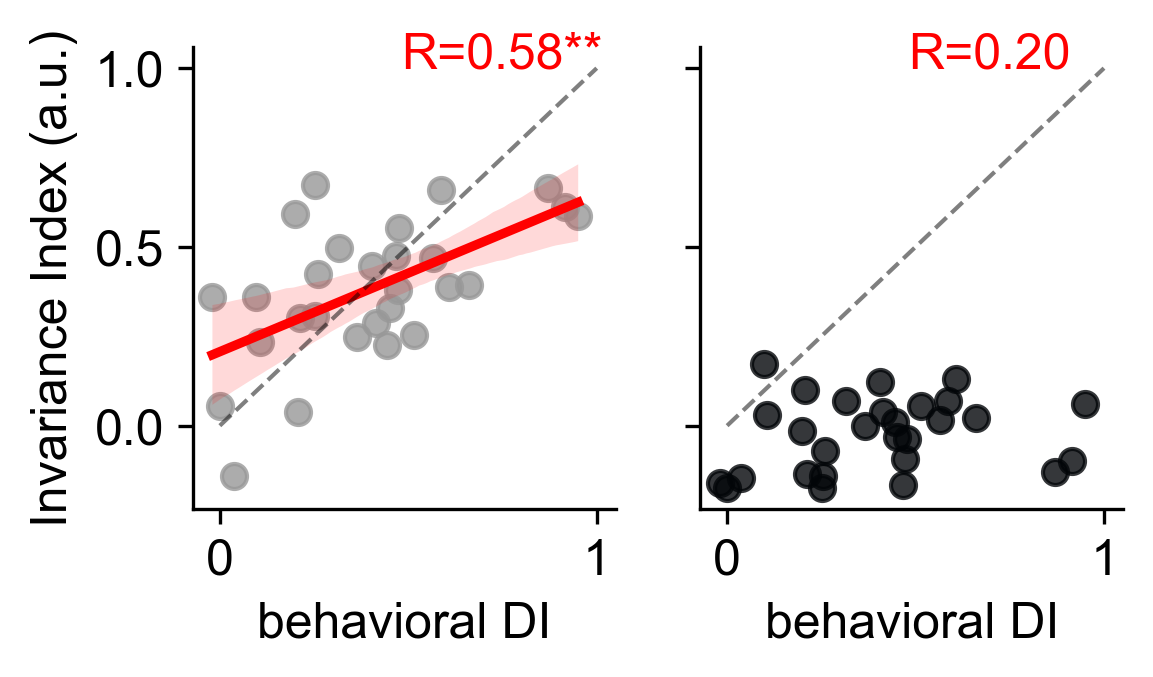

In [10]:
fig, axs = plt.subplots(1,2, figsize=(4, 2), dpi=300, sharey=True)
regplot(DI_metrics, DI_metrics_behav, "GI", "medial", 1, xlabel=True, title=False, ylabel="Invariance Index (a.u.)", refline=True, norm=True, sig_coor=(.48,1), ax=axs[0])
regplot(DI_metrics, DI_metrics_behav, "GI", "anterior", 2, xlabel=True, title=False, refline=True, norm=True, sig_coor=(.48,1), ax=axs[1])

In [11]:
ROOT_PATH = "Z:/data/PROC"
RET_PATH = "D:/retinotopy/aligned_xy/behav"
MDL_PATH = "D:/mouseobj/notz" # we don't have models there, so it will create a new one.
from src import db
dbase = db.get_sessions()
base = dbase.query("session == 'first training' | session == 'last training'").reset_index(drop=True).sort_values(by="session")
rows = []
for i, row in base.iterrows():
    name, date, blk = row['mname'], row["datexp"], row["blk"]
    m = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, 
                        data_path=ROOT_PATH, ret_path=RET_PATH,  mdl_path=MDL_PATH)
    prop_dict = utils.proportion_licks(m, lick_window=(150,250), n_trials=None)
    rows.append({
        "name": name,
        "date": date,
        "blk": blk,
        "session": row['session'],
        "rew": prop_dict.get("rewarded", np.nan),
        "nrew": prop_dict.get("non rewarded", np.nan),
        "rew_test": prop_dict.get("rewarded test", np.nan),
        "nrew_test": prop_dict.get("non rewarded test", np.nan)
    })
    clear_output(wait=True)
behavior_df = pd.DataFrame(rows)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\notz\VG15\2024_10_31\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'trial_dict', 'interp_spks', 'train_dp'])


In [13]:
behavior_df.rename(columns={
    "rew": "rewarded",
    "nrew": "non rewarded",
    "rew_test": "rewarded test",
    "nrew_test": "non rewarded test"}, inplace=True)

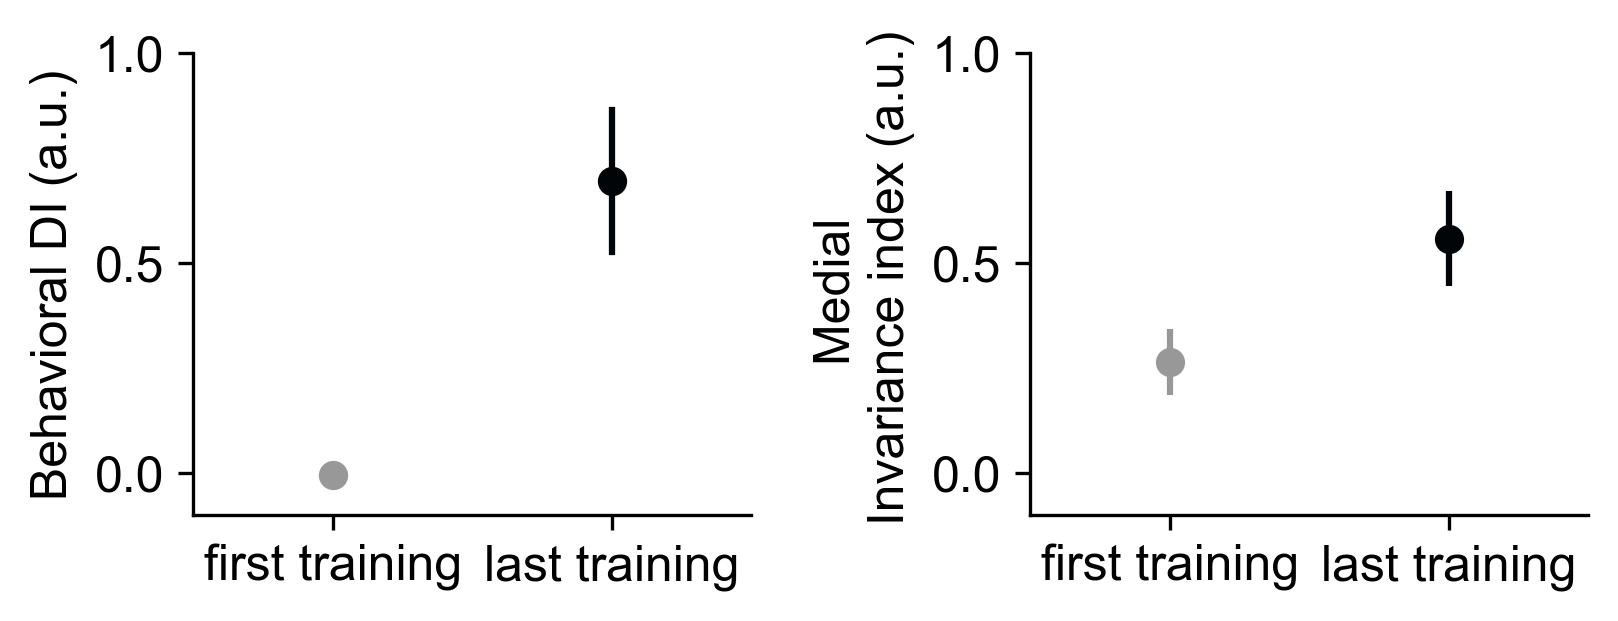

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(6, 2), dpi=300)
sns.pointplot(data=behavior_df, x="session", y="GI", hue="session", palette=["#989898", "#020508"], markers=["o", "o"], ax=ax[0], markersize=5, err_kws={'linewidth': 1.5})
ax[1].errorbar(.25,y=first_training_inv_medial.mean(),yerr=sem(first_training_inv_medial), marker='o', color='#989898', label='First training day')
ax[1].errorbar(.75,y=last_training_inv_medial.mean(),yerr=sem(last_training_inv_medial), marker='o', color='#020508', label='Last training day')
ax[0].set_ylabel("Behavioral DI (a.u.)")
ax[1].set_ylabel("Medial \n Invariance index (a.u.)")
ax[1].set_xlim(0,1)
ax[1].set_xticks([.25, .75], ["first training", "last training"])
ax[0].set_ylim(-.1, 1)
ax[1].set_ylim(-.1, 1)
ax[0].set_xlabel("")
fig.subplots_adjust(wspace=0.5)

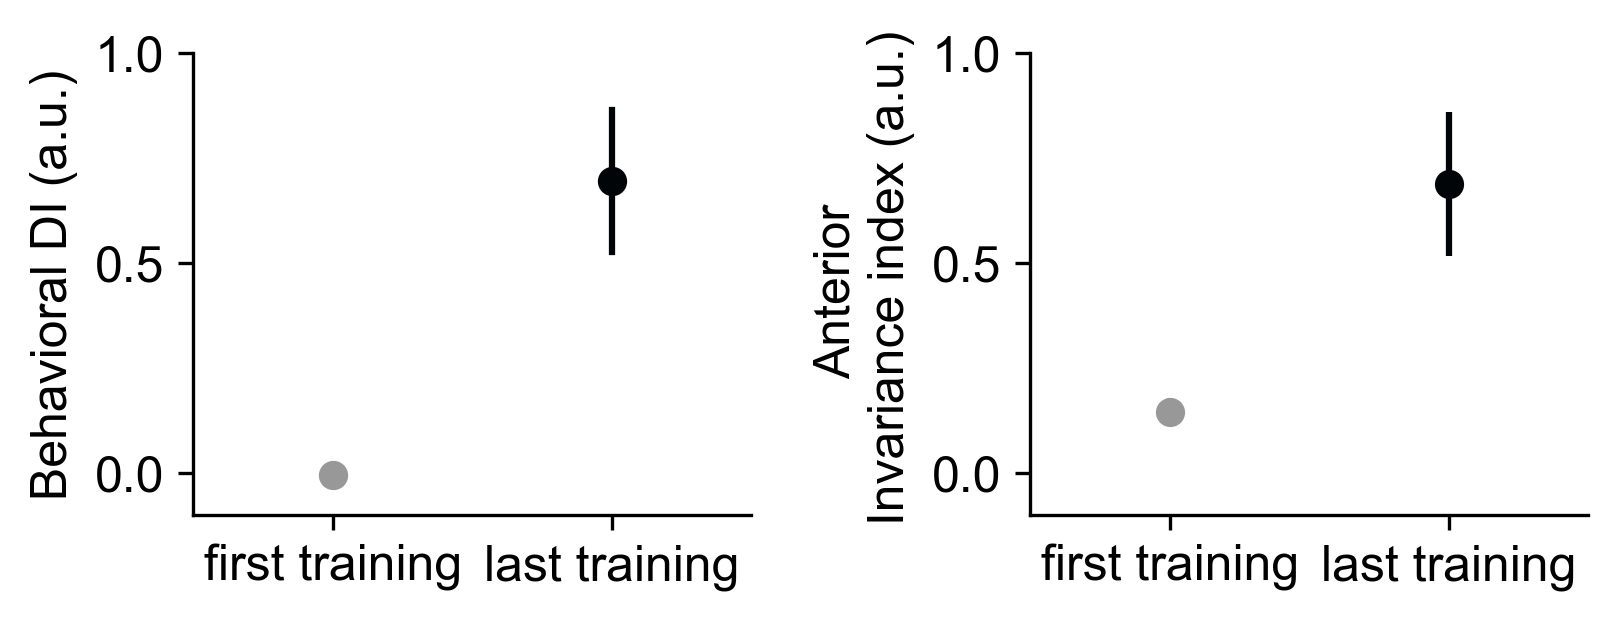

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(6, 2), dpi=300)
sns.pointplot(data=behavior_df, x="session", y="GI", hue="session", palette=["#989898", "#020508"], markers=["o", "o"], ax=ax[0], markersize=5, err_kws={'linewidth': 1.5})
ax[1].errorbar(.25,y=first_training_inv_anterior.mean(),yerr=sem(first_training_inv_anterior), marker='o', color='#989898', label='First training day')
ax[1].errorbar(.75,y=last_training_inv_anterior.mean(),yerr=sem(last_training_inv_anterior), marker='o', color='#020508', label='Last training day')
ax[0].set_ylabel("Behavioral DI (a.u.)")
ax[1].set_ylabel("Anterior \n Invariance index (a.u.)")
ax[1].set_xlim(0,1)
ax[1].set_xticks([.25, .75], ["first training", "last training"])
ax[0].set_ylim(-.1, 1)
ax[1].set_ylim(-.1, 1)
ax[0].set_xlabel("")
fig.subplots_adjust(wspace=0.5)